<a href="https://colab.research.google.com/github/iyas311/ICT/blob/main/DAY4_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas
import pandas as pd
import numpy as np

In [43]:
from google.colab import files
files.upload()

Saving CAR DETAILS FROM CAR DEKHO.csv to CAR DETAILS FROM CAR DEKHO.csv


{'CAR DETAILS FROM CAR DEKHO.csv': b'name,year,selling_price,km_driven,fuel,seller_type,transmission,owner\r\nMaruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner\r\nMaruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner\r\nHyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner\r\nDatsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner\r\nHonda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner\r\nMaruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner\r\nHyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner\r\nTata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner\r\nHyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner\r\nMaruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner\r\nChevrolet Sail 1.2 Base,2015,260000,35000,Petrol,Individual,Manual,First Owner\r\n

In [44]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv', index_col=0)

# display the first 5 rows
data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [45]:
# display the last 5 rows
data.tail()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [46]:
# check the shape of the DataFrame (rows, columns)
data.shape

(4340, 7)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data


In [47]:
# conventional way to import seaborn
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

<Axes: xlabel='km_driven', ylabel='selling_price'>

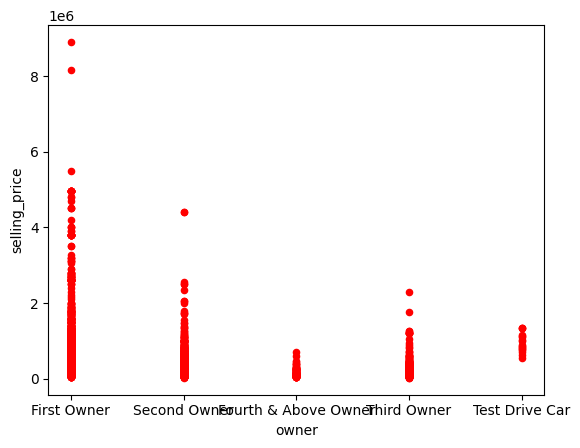

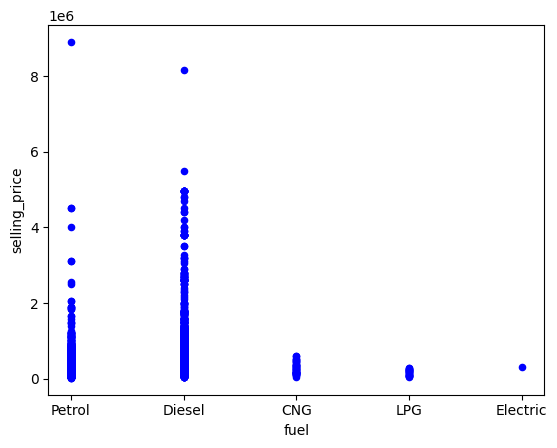

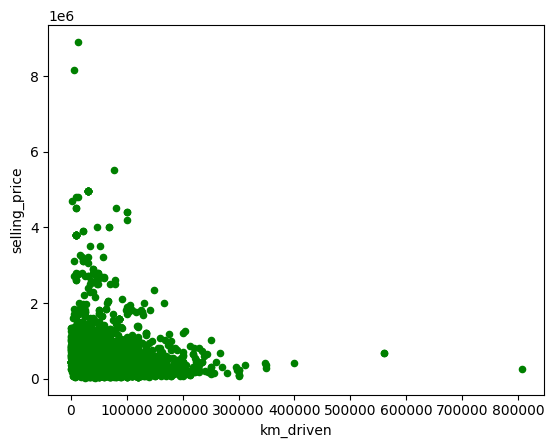

In [49]:
data.plot(kind='scatter',x='owner',y='selling_price',color='red')
data.plot(kind='scatter',x='fuel',y='selling_price',color='blue')
data.plot(kind='scatter',x='km_driven',y='selling_price',color='green')

## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [54]:
# create a Python list of feature names
feature_cols = ["year","km_driven","fuel","seller_type","transmission","owner"]

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()


,year,km_driven,fuel,seller_type,transmission,owner
name,,,,,,
Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [55]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(4340, 6)


In [56]:
# select a Series from the DataFrame
lab = ['Sales']

# equivalent command that works if there are no spaces in the column name
y =  data['selling_price']


# print the first 5 values
y.head()

name
Maruti 800 AC                60000
Maruti Wagon R LXI Minor    135000
Hyundai Verna 1.6 SX        600000
Datsun RediGO T Option      250000
Honda Amaze VX i-DTEC       450000
Name: selling_price, dtype: int64

In [57]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(4340,)


## Splitting X and y into training and testing sets

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [59]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# X_train = X_train[:150]

print(X_test)

(3255, 6)
(3255,)
(1085, 6)
(1085,)
                                       year  km_driven    fuel seller_type  \
name                                                                         
Ford Aspire Titanium Plus Diesel BSIV  2019      15000  Diesel  Individual   
Maruti Swift Dzire LDI                 2014      70000  Diesel  Individual   
Hyundai Verna 1.6 SX                   2012      90000  Diesel  Individual   
Chevrolet Beat LT Option               2016      41000  Petrol      Dealer   
Honda City i DTEC SV                   2014      71318  Diesel      Dealer   
...                                     ...        ...     ...         ...   
Mahindra Scorpio 2.6 Turbo 7 Str       2008     120000  Diesel  Individual   
Hyundai EON 1.0 Kappa Magna Plus       2015      70000  Petrol  Individual   
Toyota Fortuner 2.8 4WD AT BSIV        2017      41000  Diesel  Individual   
Tata Nano Lx                           2011      15000  Petrol  Individual   
Hyundai EON Magna Plus      

## Linear regression in scikit-learn

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



### Making predictions

In [77]:
# Encode categorical columns
le = LabelEncoder()

data['fuel'] = le.fit_transform(data['fuel'])
data['seller_type'] = le.fit_transform(data['seller_type'])
data['transmission'] = le.fit_transform(data['transmission'])
data['owner'] = le.fit_transform(data['owner'])

# Separate features and target



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Train a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[ 827096.17177837  557435.58507857  499232.62158172 ... 1588375.33843043
  251512.72235031  489827.25204995]


In [68]:
X_test

,year,km_driven,fuel,seller_type,transmission,owner
name,,,,,,
Ford Aspire Titanium Plus Diesel BSIV,2019,15000,1,1,1,0
Maruti Swift Dzire LDI,2014,70000,1,1,1,2
Hyundai Verna 1.6 SX,2012,90000,1,1,1,0
Chevrolet Beat LT Option,2016,41000,4,0,1,0
Honda City i DTEC SV,2014,71318,1,0,1,0
...,...,...,...,...,...,...
Mahindra Scorpio 2.6 Turbo 7 Str,2008,120000,1,1,1,2
Hyundai EON 1.0 Kappa Magna Plus,2015,70000,4,1,1,0
Toyota Fortuner 2.8 4WD AT BSIV,2017,41000,1,1,0,0


We need an **evaluation metric** in order to compare our predictions with the actual values!